In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import os

from scipy.stats import logistic
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from scipy.io import loadmat
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

In [37]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [62]:
X_train

array([[[[227, 220, 214],
         [227, 221, 215],
         [227, 222, 215],
         ...,
         [232, 230, 224],
         [231, 229, 222],
         [230, 229, 221]],

        [[227, 221, 214],
         [227, 221, 215],
         [228, 221, 215],
         ...,
         [232, 230, 224],
         [231, 229, 222],
         [231, 229, 221]],

        [[227, 221, 214],
         [227, 221, 214],
         [227, 221, 215],
         ...,
         [232, 230, 224],
         [231, 229, 223],
         [230, 229, 221]],

        ...,

        [[119,  81,  51],
         [124,  85,  55],
         [127,  87,  58],
         ...,
         [210, 211, 211],
         [211, 212, 210],
         [210, 211, 210]],

        [[119,  79,  51],
         [124,  84,  55],
         [126,  85,  56],
         ...,
         [210, 211, 210],
         [210, 211, 210],
         [209, 210, 209]],

        [[119,  81,  51],
         [123,  83,  55],
         [122,  82,  54],
         ...,
         [209, 210, 210],
        

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
X_train_scaled

array([[-0.65079907, -0.43057322, -0.68024847, ..., -0.36433881,
         0.32349851, -0.7578486 ],
       [-0.82835341,  0.15226547, -0.82773762, ..., -1.45036679,
         0.62563098, -1.03071387],
       [ 1.68277234,  2.18977235,  1.60009756, ...,  0.72504581,
        -0.51329768, -0.96601386],
       ...,
       [-1.33114223, -0.22172269, -1.3242844 , ..., -0.98806491,
        -0.69995543, -0.12266325],
       [-1.25110186, -0.24600763, -1.28700242, ..., -1.75887319,
        -1.56206114, -1.00989735],
       [-0.74662205,  1.14066273, -0.72203706, ..., -0.2860679 ,
        -1.24094654,  0.2126516 ]])

In [42]:
# Adam
clf = MLPClassifier(
    solver= 'adam',
    hidden_layer_sizes=(100, 100),
    random_state=0
)
clf.fit(X_train,y_train)

print("train accuracy= {:.3%}".format(clf.score(X_train,y_train)))
print("test accuracy= {:.3%}".format(clf.score(X_test,y_test)))

train accuracy= 91.315%
test accuracy= 90.909%


In [29]:
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data') 
# load hand mnist
# signs data set (fingers)
def load_dataset():
    fn =  os.path.join(path , 'train_signs.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn =  os.path.join(path , 'test_signs.h5')
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return X_train, y_train, X_test, y_test, classes

In [30]:
X_train, y_train, X_test, y_test, classes = load_dataset()
y_train = y_train.ravel()
y_test = y_test.ravel()
print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)

X_train.shape= (1080, 64, 64, 3)
X_test.shape= (120, 64, 64, 3)
y_train.shape= (1080,)
y_test.shape= (120,)


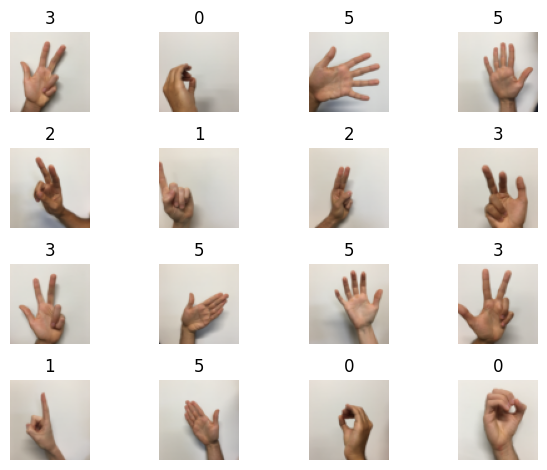

In [106]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None: 
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows): 
        for j in range (n_cols):
            index = n_rows*i+j           
            ax = plt.subplot(n_rows,n_cols,index+1) 
            plt.imshow(X[indices[index]])
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

    plt.tight_layout(h_pad=1)

plt.figure()
display_samples_in_grid(X_train, n_rows=4, y= y_train)

In [31]:
X_train.shape

(1080, 64, 64, 3)

In [32]:
h_img = 64
w_img = 64
ch_img = 3

X_train = X_train.reshape((X_train.shape[0], h_img * w_img * ch_img))
X_test = X_test.reshape((X_test.shape[0], h_img * w_img * ch_img))

In [33]:
# YOUR_CODE.  Preproces data
# START_CODE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# END_CODE     

print ("number of training examples = " + str(X_train_scaled.shape[1]))
print ("number of test examples = " + str(X_test_scaled.shape[1]))
print ("X_train_scaled shape: " + str(X_train_scaled.shape))
print ("X_test_scaled shape: " + str(X_test_scaled.shape))

number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)


In [180]:
clf = MLPClassifier(
    solver='adam',
    verbose=True,
    hidden_layer_sizes=(512, 256, 128),
    random_state=42,
    activation='relu',
    alpha=0.05,
    max_iter=200,
    early_stopping=True,
    learning_rate='adaptive'
)
clf.fit(X_train_scaled, y_train)

Iteration 1, loss = 2.31929407
Validation score: 0.750000
Iteration 2, loss = 0.91436938
Validation score: 0.833333
Iteration 3, loss = 0.55725411
Validation score: 0.851852
Iteration 4, loss = 0.31880331
Validation score: 0.888889
Iteration 5, loss = 0.28872600
Validation score: 0.916667
Iteration 6, loss = 0.22391192
Validation score: 0.916667
Iteration 7, loss = 0.23359213
Validation score: 0.916667
Iteration 8, loss = 0.21980346
Validation score: 0.907407
Iteration 9, loss = 0.21801541
Validation score: 0.907407
Iteration 10, loss = 0.21757753
Validation score: 0.925926
Iteration 11, loss = 0.21652692
Validation score: 0.925926
Iteration 12, loss = 0.21588784
Validation score: 0.935185
Iteration 13, loss = 0.21522120
Validation score: 0.925926
Iteration 14, loss = 0.21455318
Validation score: 0.925926
Iteration 15, loss = 0.21385771
Validation score: 0.925926
Iteration 16, loss = 0.21313902
Validation score: 0.925926
Iteration 17, loss = 0.21239709
Validation score: 0.925926
Iterat

MLPClassifier(alpha=0.05, early_stopping=True,
              hidden_layer_sizes=(512, 256, 128), learning_rate='adaptive',
              random_state=42, verbose=True)

In [182]:
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.83      1.00      0.91        20
           2       0.94      0.75      0.83        20
           3       0.90      0.90      0.90        20
           4       0.94      0.75      0.83        20
           5       0.83      1.00      0.91        20

    accuracy                           0.90       120
   macro avg       0.91      0.90      0.90       120
weighted avg       0.91      0.90      0.90       120



In [22]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None: 
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows): 
        for j in range (n_cols):
            index = n_rows*i+j           
            ax = plt.subplot(n_rows,n_cols,index+1) 
            plt.imshow(X[indices[index]])
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

    plt.tight_layout(h_pad=1)

In [25]:
X_test.shape

(120, 12288)

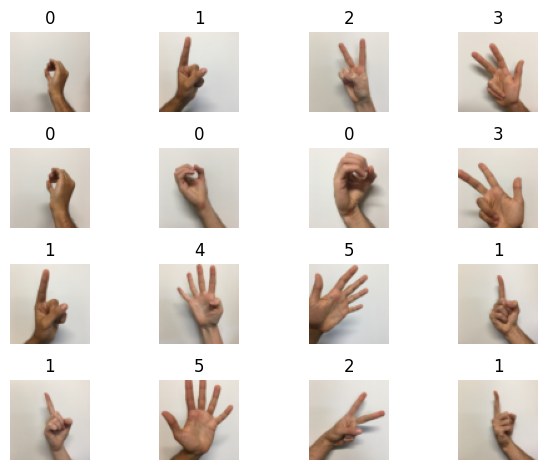

In [26]:
plt.figure()
predicted = clf.predict(X_test_scaled)
X_test_resh = X_test.reshape((120, 64, 64, 3))
display_samples_in_grid(X_test_resh, n_rows=4, y= predicted)

__Try With PCA__

In [4]:
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data') 
# load hand mnist
# signs data set (fingers)
def load_dataset():
    fn =  os.path.join(path , 'train_signs.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn =  os.path.join(path , 'test_signs.h5')
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return X_train, y_train, X_test, y_test, classes

In [5]:
X_train, y_train, X_test, y_test, classes = load_dataset()
y_train = y_train.ravel()
y_test = y_test.ravel()
print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)

X_train.shape= (1080, 64, 64, 3)
X_test.shape= (120, 64, 64, 3)
y_train.shape= (1080,)
y_test.shape= (120,)


In [6]:
h_img = 64
w_img = 64
ch_img = 3

X_train = X_train.reshape((X_train.shape[0], h_img * w_img * ch_img))
X_test = X_test.reshape((X_test.shape[0], h_img * w_img * ch_img))

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
X_train_scaled.shape

(1080, 12288)

In [10]:
pca = PCA(n_components=500)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [13]:
X_train_pca.shape

(1080, 500)

In [18]:
clf = MLPClassifier(
    solver='adam',
    verbose=True,
    hidden_layer_sizes=(500, 250),
    random_state=42,
    activation='relu',
    alpha=0.05,
    max_iter=100,
    early_stopping=False,
    learning_rate='adaptive'
)
clf.fit(X_train_scaled, y_train)

Iteration 1, loss = 2.86673417
Iteration 2, loss = 0.97415246
Iteration 3, loss = 0.51459420
Iteration 4, loss = 0.37302298
Iteration 5, loss = 0.27739479
Iteration 6, loss = 0.22520911
Iteration 7, loss = 0.25705376
Iteration 8, loss = 0.21482813
Iteration 9, loss = 0.22828735
Iteration 10, loss = 0.21012491
Iteration 11, loss = 0.21055706
Iteration 12, loss = 0.21439284
Iteration 13, loss = 0.20392116
Iteration 14, loss = 0.21815144
Iteration 15, loss = 0.20254174
Iteration 16, loss = 0.20182696
Iteration 17, loss = 0.20108511
Iteration 18, loss = 0.20021812
Iteration 19, loss = 0.19928697
Iteration 20, loss = 0.19837417
Iteration 21, loss = 0.19744403
Iteration 22, loss = 0.19649791
Iteration 23, loss = 0.19553425
Iteration 24, loss = 0.19455456
Iteration 25, loss = 0.19355982
Iteration 26, loss = 0.19255084
Iteration 27, loss = 0.19152760
Iteration 28, loss = 0.19049162
Iteration 29, loss = 0.18944312
Iteration 30, loss = 0.18838296
Iteration 31, loss = 0.18731160
Iteration 32, los

/home/forever/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.05, hidden_layer_sizes=(500, 250),
              learning_rate='adaptive', max_iter=100, random_state=42,
              verbose=True)

In [19]:
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9417

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      1.00      0.98        20
           2       1.00      0.90      0.95        20
           3       0.90      0.90      0.90        20
           4       0.94      0.85      0.89        20
           5       0.87      1.00      0.93        20

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



In [27]:
from sklearn.svm import SVC

In [34]:
clf = SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))

train accuracy= 100.000%
test accuracy= 65.000%


__Conclusion__

I dont see big difference with SVC